In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Data 불러오기

In [2]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
train_images = glob.glob("../Data/fingers/train/*.png")
test_images = glob.glob("../Data/fingers/test/*.png")

In [4]:
# file name 확인
train_images[:5]

['../Data/fingers/train\\00048bba-979b-4f84-b833-5bbbb082b582_0L.png',
 '../Data/fingers/train\\000547a2-d456-4b16-b351-12ca9b40e390_0L.png',
 '../Data/fingers/train\\000cac8e-fcf0-4f8c-bd16-c257d1e6d7a8_2L.png',
 '../Data/fingers/train\\000d9961-8136-4dee-9820-86e178777958_0L.png',
 '../Data/fingers/train\\0010095b-2e3d-4517-a511-1f688c378f96_5L.png']

In [5]:
# 갯수
print(len(train_images))
print(len(test_images))

18000
3600


In [6]:
# train data와 test data만들기 : 128X128 -> 32X32로 변경 
X_train = []
X_test = []
y_train = []
y_test = []

# train data
for image in sorted(train_images):
    img = Image.open(image)
    imgResize = img.resize((32, 32), Image.Resampling.LANCZOS)
    X_train.append(imgResize)
    y_train.append(image[-6:-4])

# test data
for image in sorted(test_images):
    img = Image.open(image)
    imgResize = img.resize((32, 32), Image.Resampling.LANCZOS)
    X_test.append(imgResize)
    y_test.append(image[-6:-4])

In [7]:
a = ['../Data/fingers/train\\00048bba-979b-4f84-b833-5bbbb082b582_0L.png']
a[0][-6:-4]

'0L'

In [8]:
# label data 확인
print(y_train[:5])
print(y_test[:5])

['0L', '0L', '2L', '0L', '5L']
['5L', '5L', '3R', '5L', '5L']


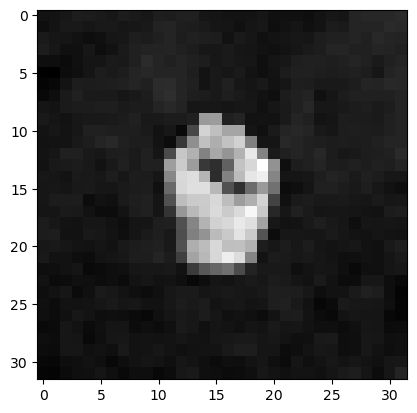

In [9]:
# train의 이미지 확인
plt.imshow(X_train[0], cmap='gray')
plt.show()

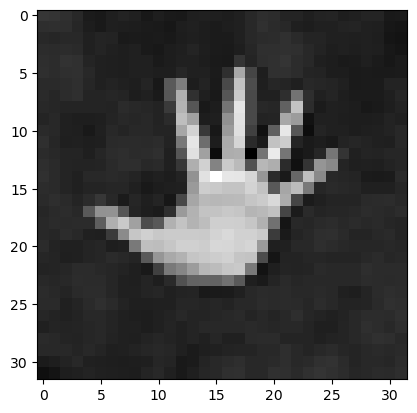

In [10]:
# test의 이미지 확인
plt.imshow(X_test[0], cmap='gray')
plt.show()

----
#### numpy배열로 변경

In [11]:
import numpy as np

In [12]:
# train data 만들기
tempData = np.zeros(18000 * 32 * 32, dtype=np.int32).reshape(18000, 32, 32)

i = 0
for image in X_train:
    img = np.array(image, dtype=np.int32)
    tempData[i,:,:] = img 
    i += 1

X_train = tempData.copy()
print(X_train.shape)

(18000, 32, 32)


In [13]:
# test Data 만들기

tempData = np.zeros(3600 * 32 * 32, dtype=np.int32).reshape(3600, 32, 32)

i = 0
for image in X_test:
    img = np.array(image, dtype=np.int32)
    tempData[i,:,:] = img 
    i += 1

X_test = tempData.copy()
print(X_test.shape)

(3600, 32, 32)


---
#### Label을 숫자화

In [14]:
# Dictionary로 구성
label_to_int = {
    '0R' : 0,
    '1R' : 1,
    '2R' : 2,
    '3R' : 3,
    '4R' : 4,
    '5R' : 5,
    '0L' : 6,
    '1L' : 7,
    '2L' : 8,
    '3L' : 9,
    '4L' : 10,
    '5L' : 11
}

In [15]:
# 숫자로 변경하기
temp = []
for label in y_train:
    temp.append(label_to_int[label])
y_train = temp.copy()

temp = []
for label in y_test:
    temp.append(label_to_int[label])
y_test = temp.copy()


In [16]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
y_test[:5]

array([11, 11,  3, 11, 11])

----
#### train, valid 및 정규화하기

In [18]:
# 정규화
train_scaled = X_train / 255.0
train_scaled = train_scaled.reshape(-1, 32*32)

# train, valid
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = \
                            train_test_split(
                                train_scaled,
                                y_train,
                                test_size=0.2,
                                random_state=42
                            )

print(train_scaled.shape, val_scaled.shape)
print(train_target.shape, val_target.shape)

(14400, 1024) (3600, 1024)
(14400,) (3600,)


----
#### Deep Learning Model
- 입력층 : 32*32
- 은닉층 : activation=relu
- 출력층 : activation=softmax
- 손실함수 : optimizer=adam, loss=sparse_categorical_crossentropy
- epochs : 10 

In [19]:
from tensorflow import keras
from tensorflow.keras.layers import Input

In [20]:
model = keras.Sequential()
model.add(Input(shape=(32*32,)))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(12, activation='softmax'))

In [23]:
# 손실함수
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
model.fit(
    train_scaled,
    train_target,
    epochs=10
)

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7535 - loss: 0.9878
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9780 - loss: 0.1047
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9887 - loss: 0.0489
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9944 - loss: 0.0295
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9965 - loss: 0.0192
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9933 - loss: 0.0215
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9991 - loss: 0.0067
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9956 - loss: 0.0148
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9991 - loss: 0.0050
Epoch 10/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9994 - loss: 0.0033


In [25]:
# train score
model.evaluate(train_scaled, train_target)

450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9998 - loss: 0.0046


[0.004287195857614279, 0.9997222423553467]

In [26]:
# valid score
model.evaluate(val_scaled, val_target)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0048


[0.004809858743101358, 0.9997222423553467]

In [27]:
# test data
test_scaled = X_test / 255.0
test_scaled = test_scaled.reshape(-1, 32*32)

model.evaluate(test_scaled, y_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9986 - loss: 0.0058 


[0.006505426950752735, 0.9983333349227905]

- train score
- valid score
- test score